<a href="https://colab.research.google.com/github/Amimo-cell/datascience/blob/main/Heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import io
import matplotlib.pylab as plt
from google. colab import files



In [30]:
#uploading files from pc
data = files.upload()

Saving data.csv to data (1).csv


In [33]:
#converting the file into a dataframe
heart_disease = pd.read_csv(io.StringIO(data['data (1).csv'].decode('utf-8')))
#view the dataframe
heart_disease.head().T

,0,1,2,3,4
age,28,29,29,30,31
sex,1,1,1,0,0
cp,2,2,2,1,2
trestbps,130,120,140,170,100
chol,132,243,?,237,219
fbs,0,0,0,0,0
restecg,2,0,0,1,1
thalach,185,160,170,170,150
exang,0,0,0,0,0
oldpeak,0.0,0.0,0.0,0.0,0.0


In [10]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    object 
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  slope       294 non-null    object 
 11  ca          294 non-null    object 
 12  thal        294 non-null    object 
 13  num         294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [34]:
# replace ? with NaN
heart_disease.replace("?", np.nan,  inplace=True)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,NaN,NaN,NaN,0
1,29,1,2,120,243,0,0,160,0,0.0,NaN,NaN,NaN,0
2,29,1,2,140,NaN,0,0,170,0,0.0,NaN,NaN,NaN,0
3,30,0,1,170,237,0,1,170,0,0.0,NaN,NaN,6,0
4,31,0,2,100,219,0,1,150,0,0.0,NaN,NaN,NaN,0


In [17]:
heart_disease["chol"]=heart_disease['chol'].astype('int64')

In [35]:
#values are present in a particular column
heart_disease['chol'].value_counts()

,count
chol,
246,5
230,5
275,5
238,4
196,4
...,...
468,1
259,1
100,1


In [36]:
heart_disease.fillna(0, inplace=True)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,0,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0,0


In [58]:
heart_disease['sex']=heart_disease['sex'].astype('int64')
heart_disease.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,object
chol,int64
fbs,object
restecg,object
thalach,object
exang,object
oldpeak,float64


In [59]:
heart_disease['chol']=heart_disease['chol'].astype('int64')
heart_disease.dtypes

,0
age,int64
sex,int64
cp,int64
trestbps,object
chol,int64
fbs,object
restecg,object
thalach,object
exang,object
oldpeak,float64


In [60]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0,0,0
2,29,1,2,140,0,0,0,170,0,0.0,0,0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0,6,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0,0,0


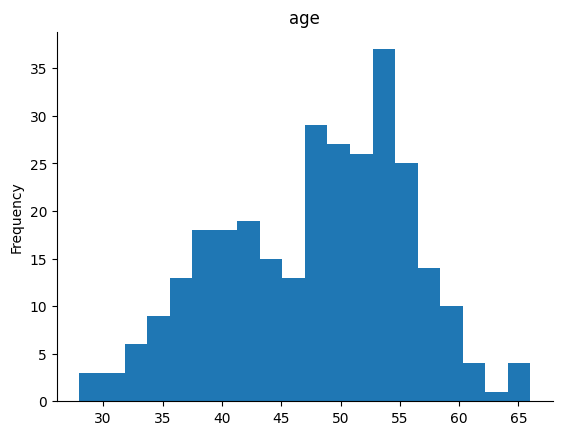

In [26]:
# @title age

from matplotlib import pyplot as plt
heart_disease['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [69]:
heart_disease['age'].value_counts()

,count
age,
54,25
48,19
52,17
55,15
49,15
46,13
53,12
50,12
43,12


In [70]:
heart_disease['NV'] = (heart_disease['age'] - heart_disease['age'].min()) / (heart_disease['age'].max() - heart_disease['age'].min())


In [65]:
heart_disease['Normalized Values'] = (heart_disease['chol'] - heart_disease['chol'].min()) / (heart_disease['chol'].max() - heart_disease['chol'].min())


Text(0.5, 1.0, 'age and cholestrol corelation')

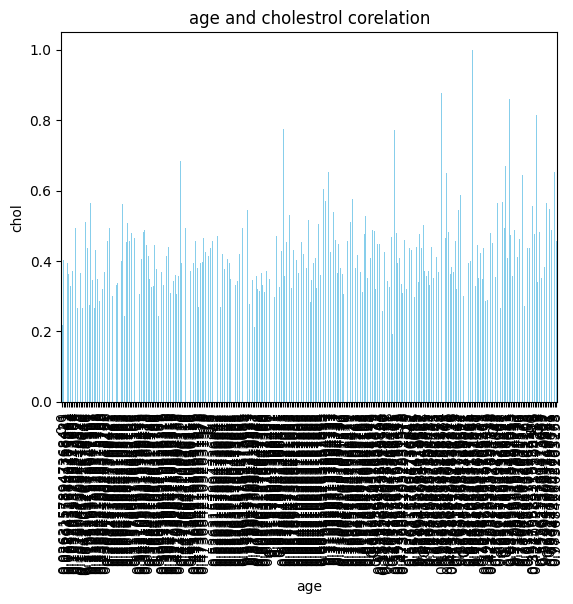

In [71]:
#plotting bar graphs
heart_disease.plot(x='NV', y='Normalized Values', kind='bar', legend=False, color='skyblue')
# Add labels and title
plt.xlabel('age')
plt.ylabel('chol')
plt.title('age and cholestrol corelation')